<a href="https://colab.research.google.com/github/rraneemm/CNNFilters/blob/main/RANEEM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os


#Load the cats VS dogs Dataset

In [ ]:
#Run the cells of this section to get the data in (x_train,y_train), (x_test,y_test)

In [ ]:
!gdown 1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
!gdown 1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
!gdown 1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
!gdown 1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN

!unzip /content/cats_test.zip
!unzip /content/cats_train.zip
!unzip /content/dogs_test.zip
!unzip /content/dogs_train.zip

Downloading...
From: https://drive.google.com/uc?id=1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
To: /content/cats_test.zip
100% 10.2M/10.2M [00:00<00:00, 51.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
To: /content/cats_train.zip
100% 21.1M/21.1M [00:00<00:00, 58.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
To: /content/dogs_test.zip
100% 11.8M/11.8M [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN
To: /content/dogs_train.zip
100% 24.5M/24.5M [00:00<00:00, 81.6MB/s]
Archive:  /content/cats_test.zip
replace cats_and_dogs_small/test/cats/cat.1699.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [N]
error:  invalid response [[N]]
replace cats_and_dogs_small/test/cats/cat.1699.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/cats_train.zip
replace cats_and_dogs_small/train/cats/cat.980.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: nA
repla

In [ ]:
cats_train_path = "/content/cats_and_dogs_small/train/cats"
cats_test_path = "/content/cats_and_dogs_small/test/cats"
dogs_train_path = "/content/cats_and_dogs_small/train/dogs"
dogs_test_path = "/content/cats_and_dogs_small/test/dogs"
train_dir = "/content/cats_and_dogs_small/train/"
testing_dir = "/content/cats_and_dogs_small/test/"

cats_train_images = [f for f in os.listdir(cats_train_path)]
cats_test_images = [f for f in os.listdir(cats_test_path)]
dogs_train_images = [f for f in os.listdir(dogs_train_path)]
dogs_test_images = [f for f in os.listdir(dogs_test_path)]

print(len(cats_train_images))
print(len(cats_test_images))
print(len(dogs_train_images))
print(len(dogs_test_images))

1000
500
1000
500


In [ ]:
cats_train = np.ndarray((len(cats_train_images),150,150,3), dtype= np.int32)
cats_test = np.ndarray((len(cats_test_images),150,150,3), dtype= np.int32)
dogs_train = np.ndarray((len(dogs_train_images),150,150,3), dtype= np.int32)
dogs_test = np.ndarray((len(dogs_test_images),150,150,3), dtype= np.int32)

for i,img_name in enumerate(cats_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/cats/" + img_name).resize((150,150))
  cats_train[i] = np.asarray(img)

for i,img_name in enumerate(cats_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/cats/" + img_name).resize((150,150))
  cats_test[i] = np.asarray(img)

for i,img_name in enumerate(dogs_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/dogs/" + img_name).resize((150,150))
  dogs_train[i] = np.asarray(img)

for i,img_name in enumerate(dogs_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/dogs/" + img_name).resize((150,150))
  dogs_test[i] = np.asarray(img)

In [ ]:
training_images = np.concatenate((cats_train,dogs_train), axis=0)
testing_images = np.concatenate((cats_test,dogs_test), axis=0)

training_labels = np.concatenate((np.ones(len(cats_train),dtype= np.int32), \
                                  np.zeros(len(dogs_train),dtype= np.int32)))
testing_labels = np.concatenate((np.ones(len(cats_test),dtype= np.int32), \
                                 np.zeros(len(dogs_test),dtype= np.int32)))

print("Input Shape: {}".format(training_images.shape))
print("Testing Shape: {}".format(testing_images.shape))
print("Traininig Size: {}".format(training_labels.shape)) # training size
print("Testing Size: {}".format(testing_labels.shape)) # testing size



Input Shape: (2000, 150, 150, 3)
Testing Shape: (1000, 150, 150, 3)
Traininig Size: (2000,)
Testing Size: (1000,)


In [ ]:
training_shuffler = np.random.permutation(len(training_images))
x_train = training_images[training_shuffler]
y_train = training_labels[training_shuffler].reshape(2000,-1)

testing_shuffler = np.random.permutation(len(testing_images))
x_test = testing_images[testing_shuffler]
y_test = testing_labels[testing_shuffler].reshape(1000,-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


#Exploratory Data Analysis



In [ ]:
# Take a minute to explore the data
# show 10 images from each class
import random

Training Data

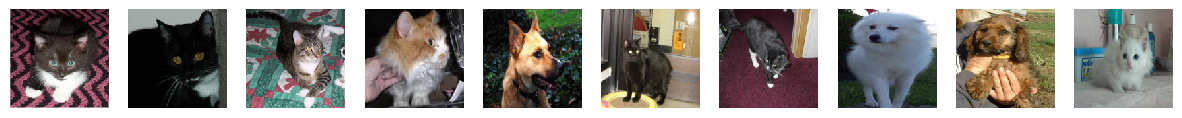

In [ ]:
#training images
pic, axes = plt.subplots(1, 10, figsize=(15, 2))  # Adjust the figure size
for i in range(10):
  random_index = random.randint(100,2000)
  axes[i].imshow(training_images[random_index], interpolation='nearest')
  axes[i].axis('off')

plt.show()

Testing Data

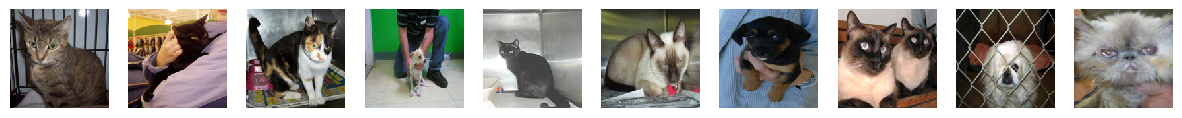

In [ ]:
#testing images
pic, axes = plt.subplots(1, 10, figsize=(15, 2))  # Adjust the figure size
for i in range(10):
  random_index = random.randint(10, 1000)
  axes[i].imshow(testing_images[random_index], interpolation='nearest')
  axes[i].axis('off')

plt.show()

#Data preproceesing

In [ ]:
#Normalize images pixels values in range [0,1]

trainingNorm_images = training_images.astype(float) /255
testingNorm_images = testing_images.astype(float) /255

# TODO: what is the difference between type (float) and ('float32')

#Classify the data using Dense Layers

In [ ]:
#Build a FCNN model to classify the data into cats and dogs
#You may use the same Architecture we used for CIFAR10 or any other Architecture
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (55% --> 60%)
#Hint: look for 'early stopping' and use it

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
##will add more layers in order to solve the issue mentioned below
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(364, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 400)               205200    
                                                                 
 dense_2 (Dense)             (None, 364)               145964    
                                                                 
 dense_3 (Dense)             (None, 256)               93440     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 1

In [ ]:
# Define early stopping to prevent overfitting
# change the patience & watch the graphs as you stop the model at different times
early_stopping = EarlyStopping(monitor='val_loss',
  patience = 5 # @param ["1", "2", "3", "4", "5", "6", "7", "8", "10", "20", "30","50"] {type:"raw"}
  ,
  restore_best_weights="True" #@param["True", "False"]
  )

model.compile(optimizer = 'Adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
"""
# ISSUES: too perfect of a model
Ways I tried to resolve it:
- changed the patience value
- changed the epochs number
- added more layers
- changed the batch size (tried going less and more)
- changed changed restore best weights to False instead if True to try to mess it up
- trained with early stopping and without early stopping
- tried the normlaized data set and the un-normalized data set
# what I dont understand: why is the accuracy the same value it doesnt change by a .001 value

SOLUTION: CHANGE THE OUTPUT LAYER TO SIGMOID FOR THE BINARY CROSSENTROPY NOT SOFTMAX
"""

'\n# ISSUES: too perfect of a model\nWays I tried to resolve it:\n- changed the patience value\n- changed the epochs number\n- added more layers \n- changed the batch size (tried going less and more)\n- changed changed restore best weights to False instead if True to try to mess it up\n- trained with early stopping and without early stopping\n- tried the normlaized data set and the un-normalized data set\n# what I dont understand: why is the accuracy the same value it doesnt change by a .001 value \n\nSOLUTION: CHANGE THE OUTPUT LAYER TO DIGMOID FOR THE BINARY CROSSENTROPY NOT SOFTMAX\n'

In [ ]:
history = model.fit(
    trainingNorm_images, training_labels, epochs = 200, batch_size = 16,
    validation_data=(testingNorm_images, testing_labels)
    ,callbacks=[early_stopping]
)


Epoch 1/200
125/125 [==============================] - 8s 33ms/step - loss: 2.0789 - accuracy: 0.5180 - val_loss: 0.6995 - val_accuracy: 0.5470
Epoch 2/200
125/125 [==============================] - 2s 17ms/step - loss: 0.7070 - accuracy: 0.5390 - val_loss: 0.6824 - val_accuracy: 0.5620
Epoch 3/200
125/125 [==============================] - 2s 16ms/step - loss: 0.7334 - accuracy: 0.5270 - val_loss: 0.6845 - val_accuracy: 0.5590
Epoch 4/200
125/125 [==============================] - 2s 16ms/step - loss: 0.6930 - accuracy: 0.5540 - val_loss: 0.6864 - val_accuracy: 0.5620
Epoch 5/200
125/125 [==============================] - 2s 18ms/step - loss: 0.7013 - accuracy: 0.5535 - val_loss: 0.6811 - val_accuracy: 0.5660
Epoch 6/200
125/125 [==============================] - 2s 18ms/step - loss: 0.6740 - accuracy: 0.5805 - val_loss: 0.6779 - val_accuracy: 0.5410
Epoch 7/200
125/125 [==============================] - 2s 18ms/step - loss: 0.6779 - accuracy: 0.5815 - val_loss: 0.6971 - val_accuracy:

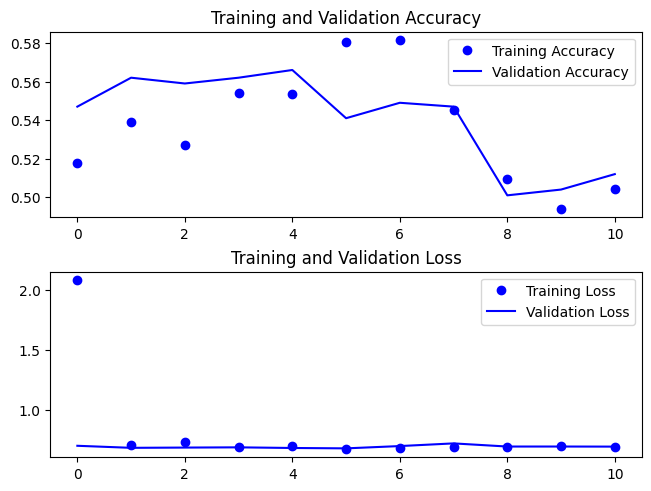

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, constrained_layout = True)

_= ax1.plot(epochs, acc,'bo', label = 'Training Accuracy')
_= ax1.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
_= ax1.set_title('Training and Validation Accuracy')
_= ax1.legend()

_= ax2.plot(epochs, loss,'bo', label = 'Training Loss')
_= ax2.plot(epochs, val_loss, 'b', label = 'Validation Loss')
_= ax2.set_title('Training and Validation Loss')
_= ax2.legend()


#Classify the data using ConvNets

In [ ]:
#Build a CNN model to classify the data into cats and dogs
#The model Architecture is as follows:
  #1. conv layer with 32 filters of size (3,3) and relu activation
  #2. max pooling layer with filter size (2,2), stride= 2
  #3. conv layer with 64 filters of size (3,3) and relu activation
  #4. max pooling layer with filter size (2,2), stride= 2
  #5. conv layer with 128 filters of size (3,3) and relu activation
  #6. max pooling layer with filter size (2,2), stride= 2
  #7. conv layer with 128 filters of size (3,3) and relu activation
  #8. max pooling layer with filter size (2,2), stride= 2
  #9. Dense Layer with 512 neurons and relu activation
  #10.Output layer
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (65% -- 70%)


In [ ]:
trainingNorms_images = training_images.astype('float32')/255
testingNorms_images = testing_images.astype('float32')/255

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
  patience = 5 # @param ["1", "2", "3", "4", "5", "6", "7", "8", "10", "20", "30","50"] {type:"raw"}
  ,
  restore_best_weights="True" #@param["True", "False"]
  )

model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    trainingNorms_images, training_labels, epochs = 10, batch_size = 16,
    validation_data = (testingNorms_images, testing_labels)
    ,callbacks=[early_stopping]
)

Epoch 1/10
125/125 [==============================] - 3s 25ms/step - loss: 0.1637 - accuracy: 0.9390 - val_loss: 1.0071 - val_accuracy: 0.6950
Epoch 2/10
125/125 [==============================] - 2s 18ms/step - loss: 0.1389 - accuracy: 0.9480 - val_loss: 1.0279 - val_accuracy: 0.7160
Epoch 3/10
125/125 [==============================] - 2s 18ms/step - loss: 0.0977 - accuracy: 0.9590 - val_loss: 1.2647 - val_accuracy: 0.6960
Epoch 4/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0863 - accuracy: 0.9720 - val_loss: 1.0742 - val_accuracy: 0.7180
Epoch 5/10
125/125 [==============================] - 2s 18ms/step - loss: 0.0670 - accuracy: 0.9760 - val_loss: 1.1919 - val_accuracy: 0.7220
Epoch 6/10
125/125 [==============================] - 2s 20ms/step - loss: 0.0652 - accuracy: 0.9790 - val_loss: 1.2632 - val_accuracy: 0.7210


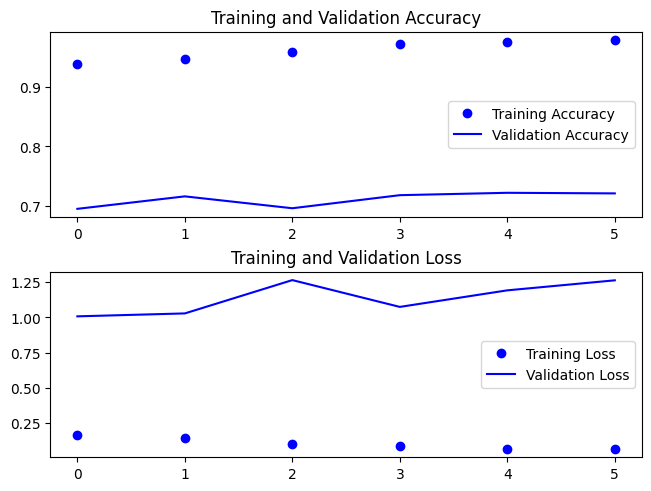

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, constrained_layout = True)

_= ax1.plot(epochs, acc,'bo', label = 'Training Accuracy')
_= ax1.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
_= ax1.set_title('Training and Validation Accuracy')
_= ax1.legend()

_= ax2.plot(epochs, loss,'bo', label = 'Training Loss')
_= ax2.plot(epochs, val_loss, 'b', label = 'Validation Loss')
_= ax2.set_title('Training and Validation Loss')
_= ax2.legend()


#Transfer Learning (VGG16)

In [ ]:
#Build a model with the help of a pretrained network (VGG16)
#Hint: search for "how to use VGG16 for Transfer Learning in Keras"
#The model Architecture is as follows:
  #1. the conv base of VGG16 (non trainable)
  #2. Dense Layer with 256 neurons and relu activation
  #3. Output layer
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (85% -- 90%)


In [ ]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

In [ ]:
from keras.applications import VGG16
from keras.models import Model

In [ ]:
basemodel = VGG16(input_shape=(150,150,3), include_top=False, weights = 'imagenet') #we dont need the top layers as we will add our own cutstomized one
#our custom top layers
x = Flatten()(basemodel.output)
denseLayer = Dense(256, activation = 'relu')(x)
outLayer = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = basemodel.input, outputs = outLayer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
  patience = 3 # @param ["1", "2", "3", "4", "5", "6", "7", "8", "10", "20", "30","50"] {type:"raw"}
  ,
  restore_best_weights="True" #@param["True", "False"]
  )

model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
trainingNorms_images = training_images.astype('float32')/255
testingNorms_images = testing_images.astype('float32')/255


history = model.fit(
    trainingNorms_images, training_labels, epochs = 200, batch_size = 16,
    validation_data = (testingNorms_images, testing_labels),
    callbacks=[early_stopping]
)

Epoch 1/200
125/125 [==============================] - 26s 151ms/step - loss: 1.0435 - accuracy: 0.5010 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 2/200
125/125 [==============================] - 17s 135ms/step - loss: 0.7065 - accuracy: 0.5060 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 3/200
125/125 [==============================] - 17s 139ms/step - loss: 0.6961 - accuracy: 0.5025 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/200
125/125 [==============================] - 17s 134ms/step - loss: 0.6975 - accuracy: 0.5140 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/200
125/125 [==============================] - 17s 136ms/step - loss: 0.6968 - accuracy: 0.4970 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/200
125/125 [==============================] - 17s 133ms/step - loss: 0.6948 - accuracy: 0.4905 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/200
125/125 [==============================] - 16s 130ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 -

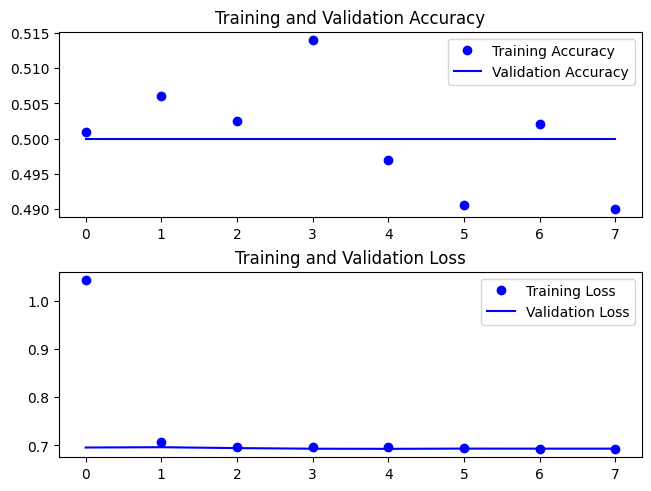

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, constrained_layout = True)

_= ax1.plot(epochs, acc,'bo', label = 'Training Accuracy')
_= ax1.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
_= ax1.set_title('Training and Validation Accuracy')
_= ax1.legend()

_= ax2.plot(epochs, loss,'bo', label = 'Training Loss')
_= ax2.plot(epochs, val_loss, 'b', label = 'Validation Loss')
_= ax2.set_title('Training and Validation Loss')
_= ax2.legend()

#Data Augmentation with Transfer Learning

In [ ]:
#Perform a brief search and try to understand what Data Augmentation means first.
#use Data Augmentation to enhance the Transfer Learning model performance
#Hint: search for ImageDataGenerator
#you should get validation accuracy of about (95% --> 97%)



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(monitor='val_loss',
  patience = 5 # @param ["1", "2", "3", "4", "5", "6", "7", "8", "10", "20", "30","50"] {type:"raw"}
  ,
  restore_best_weights="False" #@param["True", "False"]
  )

model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(
    datagen.flow(trainingNorms_images, training_labels,batch_size = 128) epochs = 20,
    validation_data = (testingNorms_images, testing_labels),
    callbacks=[early_stopping]
)


Epoch 1/20
16/16 [==============================] - 19s 943ms/step - loss: 0.7641 - accuracy: 0.5480 - val_loss: 0.6870 - val_accuracy: 0.5390
Epoch 2/20
16/16 [==============================] - 14s 905ms/step - loss: 0.6495 - accuracy: 0.6125 - val_loss: 0.8296 - val_accuracy: 0.5520
Epoch 3/20
16/16 [==============================] - 15s 940ms/step - loss: 0.6131 - accuracy: 0.6585 - val_loss: 0.6038 - val_accuracy: 0.6660
Epoch 4/20
16/16 [==============================] - 14s 886ms/step - loss: 0.5713 - accuracy: 0.7115 - val_loss: 0.6052 - val_accuracy: 0.6860
Epoch 5/20
16/16 [==============================] - 15s 927ms/step - loss: 0.5520 - accuracy: 0.7265 - val_loss: 0.5930 - val_accuracy: 0.6940
Epoch 6/20
16/16 [==============================] - 14s 890ms/step - loss: 0.5263 - accuracy: 0.7340 - val_loss: 0.5926 - val_accuracy: 0.6940
Epoch 7/20
16/16 [==============================] - 14s 892ms/step - loss: 0.4994 - accuracy: 0.7575 - val_loss: 0.5930 - val_accuracy: 0.7140

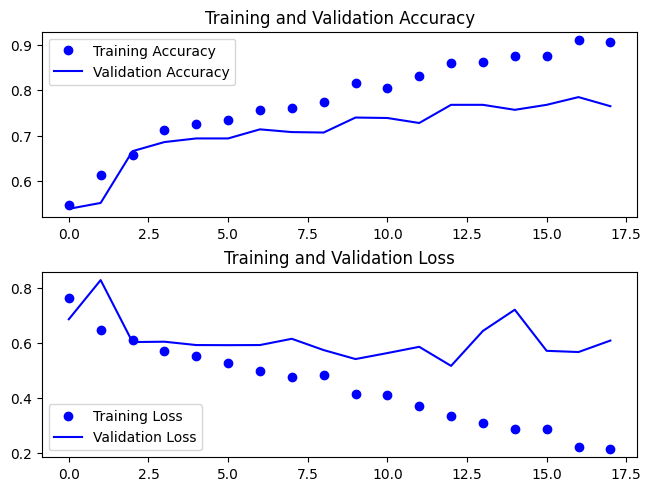

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, constrained_layout = True)

_= ax1.plot(epochs, acc,'bo', label = 'Training Accuracy')
_= ax1.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
_= ax1.set_title('Training and Validation Accuracy')
_= ax1.legend()

_= ax2.plot(epochs, loss,'bo', label = 'Training Loss')
_= ax2.plot(epochs, val_loss, 'b', label = 'Validation Loss')
_= ax2.set_title('Training and Validation Loss')
_= ax2.legend()